### Notebook 3_1

## Second Order System — Damping

#### Student Learning Outcomes
* Learn the step and impulse response of second order systems.
* Learn the system damping.
--------------------

In [6]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Observe System Response</h2>
</div>


In this task, we will play with the interactive graph and observe the response of such second order system:

$$H(s) = \frac{Y(s)}{X(s)}=\frac{M}{s^2+10s+M}$$

Assume unit impulse $X(s) = 1$ or unit step $X(s) = 1/s$.

When we set $M$ as different numbers, the system will produce different outputs.

* Firstly, run the code and observe the impulse response when set as different $M$ values
* Secondly, change the code-line ```t_out, y_out = sig.impulse(system, T=t)``` to ```t_out, y_out = sig.step(system, T=t)```, run the code again and observe the step response when set as different $M$ values

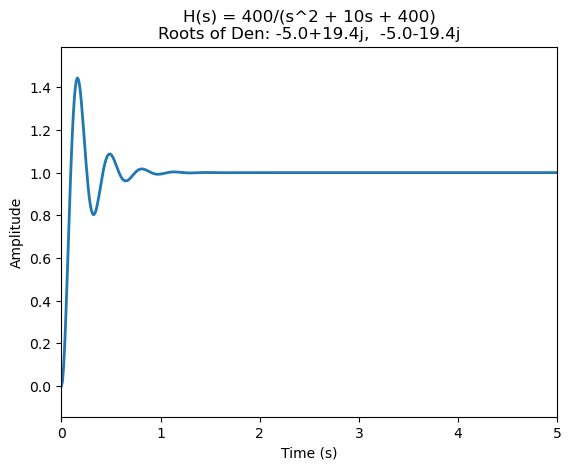

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#----------------------------------------------------
# 1) Animation Configuration
#----------------------------------------------------
M_values = np.linspace(5, 400, 80)  
time_end = 5.0                     
num_time_points = 500             
t = np.linspace(0, time_end, num_time_points)

#----------------------------------------------------
# 2) Create Figure & Initialize
#----------------------------------------------------
fig, ax = plt.subplots()
(line,) = ax.plot([], [], lw=2)
ax.set_xlim([0, time_end])
ax.set_ylim([-1, 1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
title_text = ax.set_title("Impulse Response")

def init():
    line.set_data([], [])
    return (line,)

#----------------------------------------------------
# 3) Update Function: Called Each Frame
#----------------------------------------------------
def update(frame):
    M = M_values[frame]
    system = sig.lti([M], [1, 10, M])
    t_out, y_out = sig.step(system, T=t)
    line.set_data(t_out, y_out)
    y_min, y_max = y_out.min(), y_out.max()
    if y_min == y_max:
        y_min, y_max = -1, 1  # fallback if the response is zero
    else:
        margin = 0.1 * (y_max - y_min)
        ax.set_ylim([y_min - margin, y_max + margin])
    roots = np.roots([1, 10, M])  # Solve s^2 + 10s + Ω = 0
        # Format each root as "a+bj"
    root_strs = []
    for r in roots:
        real_part = f"{r.real:.1f}"
        imag_part = f"{abs(r.imag):.1f}j"
        sign = "+" if r.imag >= 0 else "-"
        root_strs.append(f"{real_part}{sign}{imag_part}")
        
    title_text.set_text(
        f"H(s) = {M:.0f}/(s^2 + 10s + {M:.0f})\n"
        f"Roots of Den: {root_strs[0]},  {root_strs[1]}"
    )
    return (line,)

#----------------------------------------------------
# 4) Build & Display Animation
#----------------------------------------------------
anim = FuncAnimation(
    fig, update, frames=len(M_values), init_func=init,
    interval=200, blit=True
)

HTML(anim.to_jshtml())  


-----------

* When the impulse response has a portion below zero, the system is experiencing oscillation (or called **Damping**).
* When the step response has a portion above steady state amplitude (1 in this example), the system is experiencing oscillation (or called **Damping**).

Based on your observation, indicate:
* the $M$ value range, where the Damping happened on the impulse response
* the $M$ value range, where the Damping happened on the step response

** Answer **
* $M \geq 30$, impulse response has damping
* $M \geq 30$, step response has damping

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>M Range 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Analyze the Response by Laplace</h2>
</div>


In [7]:
%matplotlib inline 
## disable the Task 1 interactive GUI

------
In the Task 1, you can observe different $M$ values resuluting different response.

Now, We study three examples in details. We derive their system response using Laplace-Inverse Laplace approach. 

**Example 1**
* $H(s)=\dfrac{21}{s^2+10s+21}$;
* Laplace with Partial Fraction $Y(s) =H(s)X(s)=\dfrac{21}{(s+3)(s+7)} =\dfrac{21}{4}(\dfrac{1}{s+3}-\dfrac{1}{s+7}) $;
* Inverse Laplace $y(t) =\frac{21}{4}(e^{-3 t}-e^{-7t}) $

**Example 2**
* $H(s)=\dfrac{25}{s^2+10s+25}$;
* Laplace with Partial Fraction $Y(s) =H(s)X(s)=\frac{25}{(s+5)(s+5)}  $;
* Inverse Laplace $y(t) =25te^{-5 t} $

**Example 3**
* $H(s)=\dfrac{125}{s^2+10s+125}$;
* Laplace with Partial Fraction $Y(s) =H(s)X(s)=\dfrac{125}{(s+5+10j)(s+5-10j)} = \frac{25}{4}j(\dfrac{1}{s+5+10j}-\dfrac{1}{s+5-10j})  $;
* Inverse Laplace $y(t) =\frac{25}{4}j(e^{(-5-10j)t}-e^{(-5+10j)t}) = \frac{25}{4}e^{-5t}(je^{-10jt}-je^{10jt})$
* Simply by Euler's formula, $y(t)=\frac{25}{4}e^{-5t}(2\sin(10t))$

--------
Now, it is your job to plot these 3 responses on the same figure. 

You can either use the ```scipy.signal.impulse``` with transfer function, or direct type the derived $y(t)$ above.

These two approaches should produce the same plot for a same system.


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot Impulse: 2 pt</strong>
</span>

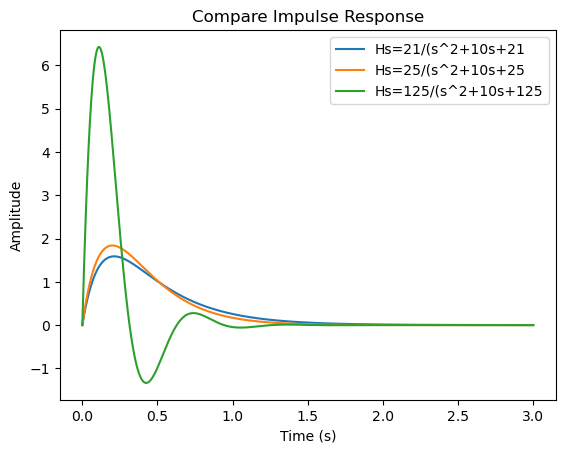

In [9]:
t = np.linspace(0, 3, 1000)
out1 = 21/4*(np.exp(-3*t)-np.exp(-7*t)) 
out2 = 25*t*np.exp(-5*t)
out3 = 25/4*np.exp(-5*t)*2*np.sin(10*t)

plt.plot(t, out1, label='Hs=21/(s^2+10s+21')
plt.plot(t, out2, label='Hs=25/(s^2+10s+25')
plt.plot(t, out3, label='Hs=125/(s^2+10s+125')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Compare Impulse Response")
plt.legend()

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Conclusions for System Damping</h2>
</div>


From Task 1 & 2, the system’s damping is determined by the **roots of the transfer function’s denominator**. 

**Conclusion 1**

* If the roots are complex roots, the response exhibits oscillatory behavior. We call it an **Underdamped System**.
  * Such as $H(s)=\dfrac{\cdots}{s^2+10s+125}$. roots are $-5-10j. -5+10j$.
* If the roots are repeated real roots, the response decays/increases as quickly as possible without oscillating. We call it a **Critically Damped System**.
  * Such as $H(s)=\dfrac{\cdots}{s^2+10s+25}$. roots are $-5, -5$.
* If the roots are two distinct real roots, response decays without oscillation. We call it an **Overdamped System**.
  * Such as $H(s)=\dfrac{\cdots}{s^2+10s+21}$. roots are $-3, -7$.
--------

Formally, for a second order system, we typically write as:

$$H(s) = \frac{\cdots}{s^2+2\zeta\omega_n s+\omega_n^2}$$

* The numerator is written as $\cdots$, since it does not affect the system’s damping, so we can ignore.
* The equation $s^2+\zeta\omega_n s+\omega_n^2 =0$ is called **Characteristic Equation of a system**.
* $\zeta$ is called **damping ratio**, $\omega_n$ is called **natural frequency**.

------------
$$s^2+\zeta\omega_n s+\omega_n^2 =0$$ 

Recall Quadratic Formula, https://en.wikipedia.org/wiki/Quadratic_formula ,the two roots are:
$$s_{1,2} = \frac{-b\pm\sqrt{b^2-4ac}}{2a} = \frac{-\zeta\omega_n\pm \sqrt{4\zeta^2\omega_n^2-4\omega_n^2}}{2} = \frac{-\zeta\omega_n\pm 2\omega_n\sqrt{\zeta^2-1}}{2}$$

-------------
Here, when at different damping ratio $\zeta$, the $\sqrt{\zeta^2-1}$ term can be real or complex, thus makes the roots $s_{1,2}$ to be real or complex.

**Conclusion 2**

* When $0<\zeta<1$, the system is **Underdamped**. (complex roots)
* When $\zeta=1$, the system is **Critically Damped**. (repeated real roots)
* When $\zeta>1$, system is **Overdamped** (two distinct real roots)

-----------
**Conclusion 3**

Given a **Underdamped System**, its response is essentially the multiplication of an exponential signal and a sine signal.

Specially, for Specially, for such transfer function, $$H(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_n s+\omega_n^2},  (0<\zeta<1)$$

Its unit impulse response is 
$$y(t) = \frac{\omega_n}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_n t}\sin\bigl(\omega_n\sqrt{1-\zeta^2}t\bigr)$$

Its unit step response is 
$$y(t) = 1-\frac{1}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_n t}\sin\bigl(\omega_n\sqrt{1-\zeta^2}t+\arccos(\zeta)\bigr)$$

-----------
**Example**

Now, let's verify the Conclusion 3 with an example.

$$H(s) = \frac{300}{s^2+ 10s + 900}$$

Firstly, we need to scale it to be the standard form:

$$H(s) = \frac{1}{3}\times \frac{900}{s^2+ 10s + 900}$$

Then we can obtain:

$$\omega_n= \sqrt{900} = 30, \zeta = 10/2/\omega_n = 1/6$$

------------
**Verify Impulse Response Expression**

In the next code cell, plot three signals in a same figure:
* $\frac{\omega_n}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_n t}\times \frac{1}{3}$ (your job)
    * (Note: $\frac{1}{3}$ is for scaling in the transfer function)
* $\sin\bigl(\omega_n\sqrt{1-\zeta^2}t\bigr)$ (your job)
* Impulse response of the system (already typed)

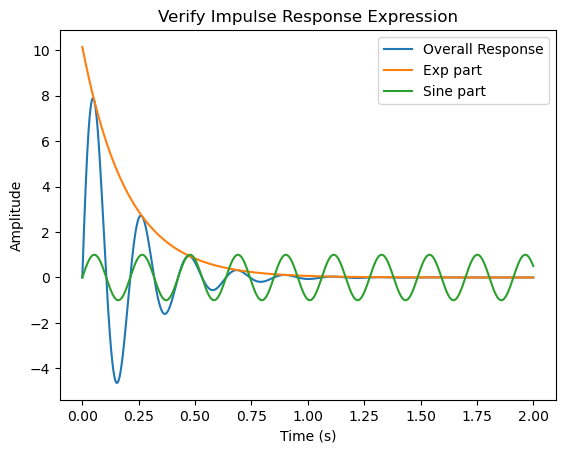

In [12]:
w_n = 30
zeta = 1/6

# subscript task3 for Task 3
H_task3 = sig.lti([300], [1, 10, 900])
t_task3 = np.linspace(0, 2, 1000)
_, y_impulse_3 = sig.impulse(H_task3, T=t_task3)
plt.plot(t_task3, y_impulse_3, label='Overall Response')

# plot signals
plt.plot(t_task3, w_n/np.sqrt(1-zeta**2)*np.exp(-zeta*w_n*t_task3)/3, label = 'Exp part')
plt.plot(t_task3, np.sin(w_n*np.sqrt(1-zeta**2)*t_task3), label = 'Sine part')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Verify Impulse Response Expression")
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot Impulse: 1 pt</strong>
</span>

----------
**Verify Step Response Expression**

In the next code cell, plot three signals in a same figure:
* $(1-\frac{1}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_n t})\times \frac{1}{3}$ (your job)
    * (Note: $\frac{1}{3}$ is for scaling in the transfer function)
* $(1+\frac{1}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_n t})\times \frac{1}{3}$ (your job)
* $\sin\bigl(\omega_n\sqrt{1-\zeta^2}t+\arccos(\zeta)\bigr)$ (already typed)
* Step response of the system (already typed)

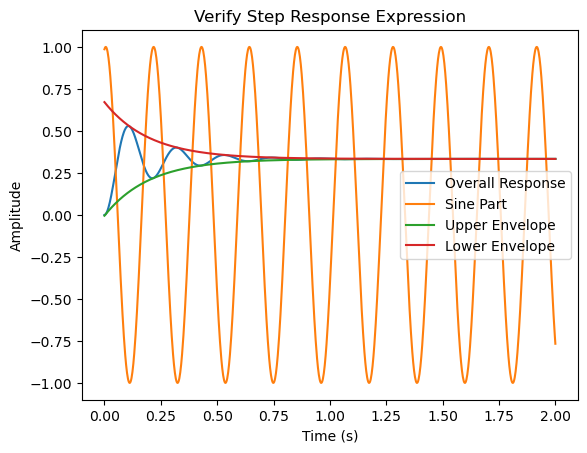

In [15]:
w_n = 30
zeta = 1/6

# subscript task3 for Task 3
H_task3 = sig.lti([300], [1, 10, 900])
t_task3 = np.linspace(0, 2, 1000)
_, y_step_3 = sig.step(H_task3, T=t_task3)
plt.plot(t_task3, y_step_3, label='Overall Response')
plt.plot(t_task3, np.sin(w_n*np.sqrt(1-zeta*zeta)*t_task3+np.arccos(zeta)), label='Sine Part')
# plot signals
plt.plot(t_task3, (1-1/np.sqrt(1-zeta**2)*np.exp(-zeta*w_n*t_task3))/3, label='Upper Envelope')
plt.plot(t_task3, (1+1/np.sqrt(1-zeta**2)*np.exp(-zeta*w_n*t_task3))/3, label='Lower Envelope')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Verify Step Response Expression")
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot Step: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


